In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
coordinates = pd.read_csv('coordinates.csv', index_col=0)
devaucouleurs = pd.read_csv('devaucouleurs.csv', index_col=0)
exponential = pd.read_csv('exponential.csv', index_col=0)
extinction = pd.read_csv('extinction.csv', index_col=0)
fiber = pd.read_csv('fiber.csv', index_col=0)
flags = pd.read_csv('flags.csv', index_col=0)
isophotal = pd.read_csv('isophotal.csv', index_col=0)
m = pd.read_csv('m.csv', index_col=0)
model = pd.read_csv('model.csv', index_col=0)
object_info = pd.read_csv('object_info.csv', index_col=0)
petro = pd.read_csv('petro.csv', index_col=0)
position = pd.read_csv('position.csv', index_col=0)
prof = pd.read_csv('prof.csv', index_col=0)
psf = pd.read_csv('psf.csv', index_col=0)
signal = pd.read_csv('signal.csv', index_col=0)
sky = pd.read_csv('sky.csv', index_col=0)
stokes = pd.read_csv('stokes.csv', index_col=0)
target = pd.read_csv('target.csv', index_col=0)
texture = pd.read_csv('texture.csv', index_col=0)
types = pd.read_csv('types.csv', index_col=0)

In [9]:
def get_cw(df):
    return df[df['rotation'] == 'cw']

def get_ccw(df):
    return df[df['rotation'] == 'ccw']



| Band  | Wavelength |   Spectrum   |
|-------|------------|--------------|
|   U   |   365 nm   |  ultraviolet |
|   G   |   464 nm   |    visible   |
|   R   |   658 nm   |    visible   |
| **I** |   806 nm   |   infrared   |
|   Z   |   900 nm   |   infrared   |

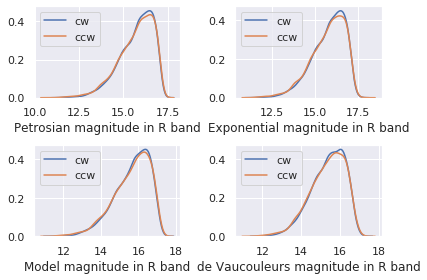

In [41]:
plt.subplot(221)
sns.distplot(get_cw(petro)['petroMag_r'], label='cw', hist=False, kde=True)
sns.distplot(get_ccw(petro)['petroMag_r'], label='ccw', hist=False, kde=True)
plt.xlabel('Petrosian magnitude in R band')
plt.subplot(222)
sns.distplot(get_cw(exponential)['expMag_r'], label='cw', hist=False, kde=True)
sns.distplot(get_ccw(exponential)['expMag_r'], label='ccw', hist=False, kde=True)
plt.xlabel('Exponential magnitude in R band')
plt.subplot(223)
sns.distplot(get_cw(model)['modelMag_r'], label='cw', hist=False, kde=True)
sns.distplot(get_ccw(model)['modelMag_r'], label='ccw', hist=False, kde=True)
plt.xlabel('Model magnitude in R band')
plt.subplot(224)
sns.distplot(get_cw(devaucouleurs)['deVMag_r'], label='cw', hist=False, kde=True)
sns.distplot(get_ccw(devaucouleurs)['deVMag_r'], label='ccw', hist=False, kde=True)
plt.xlabel('de Vaucouleurs magnitude in R band')
plt.tight_layout()
plt.show()

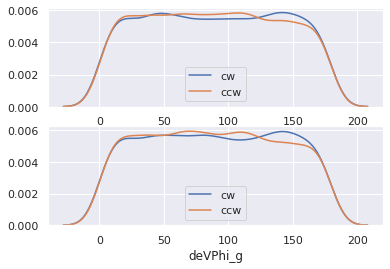

In [13]:
plt.subplot(211)
sns.distplot(get_cw(exponential)['expPhi_g'], label='cw', hist=False, kde=True)
sns.distplot(get_ccw(exponential)['expPhi_g'], label='ccw', hist=False, kde=True)

plt.subplot(212)
sns.distplot(get_cw(devaucouleurs)['deVPhi_g'], label='cw', hist=False, kde=True)
sns.distplot(get_ccw(devaucouleurs)['deVPhi_g'], label='ccw', hist=False, kde=True)

plt.show()

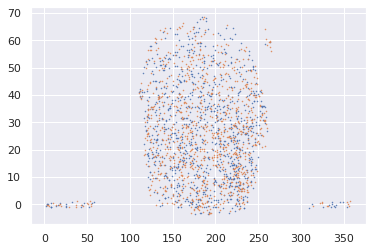

In [20]:
plt.plot('ra', 'dec', data=get_cw(coordinates).sample(1000), linestyle='', marker='o', markersize=0.5, label='cw')
plt.plot('ra', 'dec', data=get_ccw(coordinates).sample(1000), linestyle='', marker='o', markersize=0.5, label='ccw')
plt.show()

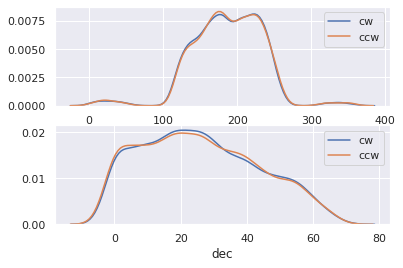

In [44]:
plt.subplot(211)
sns.distplot(get_cw(coordinates)['ra'], label='cw', hist=False, kde=True)
sns.distplot(get_ccw(coordinates)['ra'], label='ccw', hist=False, kde=True)

plt.subplot(212)
sns.distplot(get_cw(coordinates)['dec'], label='cw', hist=False, kde=True)
sns.distplot(get_ccw(coordinates)['dec'], label='ccw', hist=False, kde=True)

plt.show()

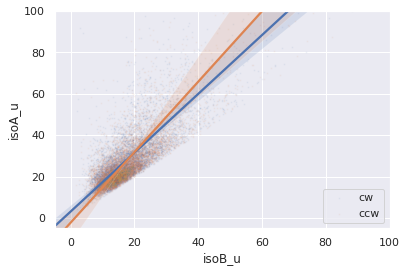

1.6833727149063742
1.6608091177148538


In [16]:
#iso_sampled = isophotal.sample(1000)
ax = sns.regplot(x=get_cw(isophotal)['isoB_u'], y=get_cw(isophotal)['isoA_u'], 
            label='cw', scatter_kws={'alpha':0.05, 's':1})
ax = sns.regplot(x=get_ccw(isophotal)['isoB_u'], y=get_ccw(isophotal)['isoA_u'], 
            label='ccw', scatter_kws={'alpha':0.05, 's':1})
plt.xlim(-5, 100)
plt.ylim(-5, 100)
plt.legend()
plt.show()

print((get_cw(isophotal)['isoA_u']/get_cw(isophotal)['isoB_u']).mean())
print((get_ccw(isophotal)['isoA_u']/get_ccw(isophotal)['isoB_u']).mean())

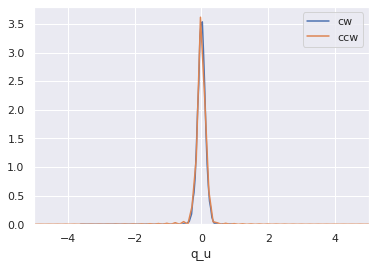

In [21]:
sns.distplot(get_cw(stokes)['q_u'], label='cw', hist=False, kde=True)
sns.distplot(get_ccw(stokes)['q_u'], label='ccw', hist=False, kde=True)
plt.xlim(-5, 5)
plt.show()

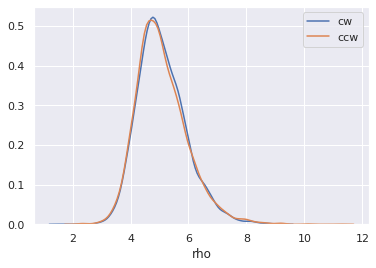

In [22]:
sns.distplot(get_cw(object_info)['rho'], label='cw', hist=False, kde=True)
sns.distplot(get_ccw(object_info)['rho'], label='ccw', hist=False, kde=True)
plt.show()

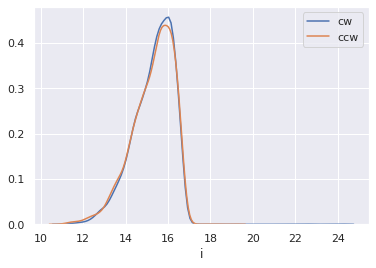

In [30]:
sns.distplot(get_cw(signal)['i'], label='cw', hist=False, kde=True)
sns.distplot(get_ccw(signal)['i'], label='ccw', hist=False, kde=True)
plt.show()